In [17]:
import pandas as pd
import numpy as np
import os

import warnings
warnings.filterwarnings("ignore")

In [18]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
submission = pd.read_csv('submission.csv')

In [19]:
train.head()

,date_time,wind_direction,sky_condition,precipitation_form,wind_speed,humidity,low_temp,high_temp,Precipitation_Probability,number_of_rentals
0,2018-04-01,207.500,4.000,0.000,3.050,75.000,12.600,21.000,30.000,22994
1,2018-04-02,208.317,2.950,0.000,3.278,69.833,12.812,19.000,19.500,28139
2,2018-04-03,213.516,2.911,0.000,2.690,74.879,10.312,15.316,19.113,26817
3,2018-04-04,143.836,3.692,0.425,3.138,71.849,8.312,12.368,43.493,26034
4,2018-04-05,95.905,4.000,0.723,3.186,73.784,5.875,10.421,63.378,2833


In [20]:
test.head()

,date_time,wind_direction,sky_condition,precipitation_form,wind_speed,humidity,low_temp,high_temp,Precipitation_Probability
0,2021-04-01,108.833,3.000,0.000,2.900,28.333,11.800,20.667,18.333
1,2021-04-02,116.717,3.850,0.000,2.662,46.417,12.000,19.000,28.500
2,2021-04-03,82.669,4.000,0.565,2.165,77.258,8.875,16.368,52.847
3,2021-04-04,44.123,3.466,0.466,3.747,63.288,6.250,17.368,37.671
4,2021-04-05,147.791,1.500,0.000,1.560,48.176,7.188,18.684,4.459


In [24]:
train.columns

Index(['date_time', 'wind_direction', 'sky_condition', 'precipitation_form',
       'wind_speed', 'humidity', 'low_temp', 'high_temp',
       'Precipitation_Probability', 'number_of_rentals'],
      dtype='object')

In [25]:
test.columns

Index(['date_time', 'wind_direction', 'sky_condition', 'precipitation_form',
       'wind_speed', 'humidity', 'low_temp', 'high_temp',
       'Precipitation_Probability'],
      dtype='object')

number_of_rentals : 따릉이 대여량(Y값), date_time : 날짜, wind_direction : 풍향

sky_condition : 하늘 상태(1 : 맑음, 3 : 구름 많음, 4 : 흐림, 하루에 8번 측정한 값 평균)

precipitation_form : 강수 형태(0 : 맑음, 1 : 비, 마찬가지로 하루에 8번 측정한 값 평균)

wind_speed : 풍속, humidity : 습도, low_temp : 최저기온, high_temp : 최고기온, precipitation_Probability : 강수확률

결측값은 없습니다.

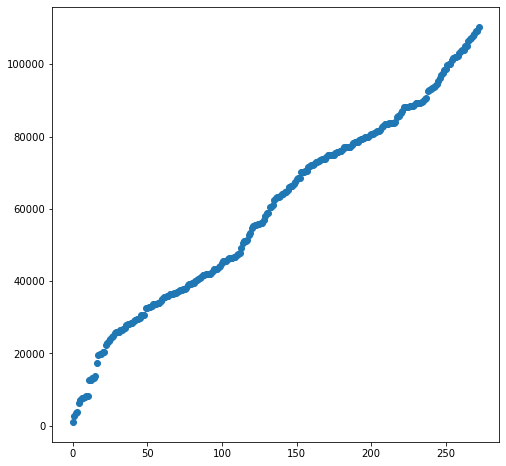

In [27]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,8))
plt.scatter(range(train.shape[0]), np.sort(train['number_of_rentals'].values))
plt.show()

In [28]:
train['date_time']= pd.to_datetime(train['date_time'])
test['date_time']= pd.to_datetime(test['date_time'])


train['day']=pd.DatetimeIndex(train['date_time']).day
test['day']=pd.DatetimeIndex(test['date_time']).day
train['month']=pd.DatetimeIndex(train['date_time']).month
test['month']=pd.DatetimeIndex(test['date_time']).month
train['year']=pd.DatetimeIndex(train['date_time']).year
test['year']=pd.DatetimeIndex(test['date_time']).year
train['weekday']=pd.DatetimeIndex(train['date_time']).weekday
test['weekday']=pd.DatetimeIndex(test['date_time']).weekday

321.622

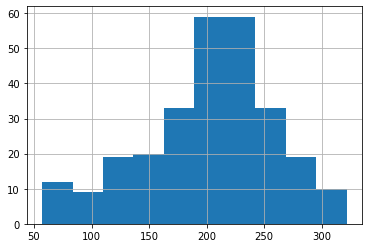

In [30]:
train['wind_direction'].hist()
train['wind_direction'].max()


In [31]:
train['precipitation_form'].corr(train['Precipitation_Probability'])

0.9106089542607183

In [32]:
train['precipitation_form'].corr(train['sky_condition'])

0.6738137525457334

<BarContainer object of 91 artists>

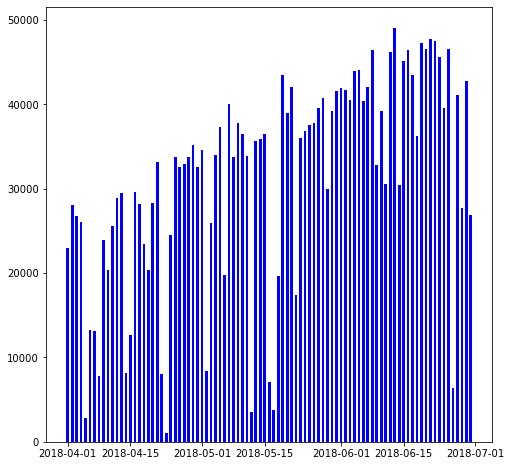

In [34]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,8))
plt.bar(train['date_time'][train['year']==2018], train['number_of_rentals'][train['year']==2018],width=0.6, color='blue')

In [35]:
train['day'][train['month'] == 5] += 30
train['day'][train['month'] == 6] += 61

test['day'][test['month'] == 5] += 30
test['day'][test['month'] == 6] += 61

KeyError: 'month'

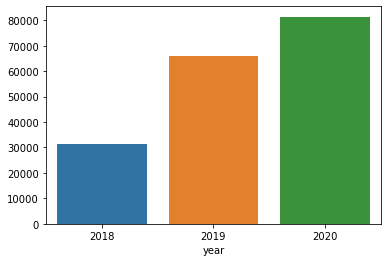

In [36]:
import seaborn as sns

def barplots(variable):
    plot = train.groupby(variable)['number_of_rentals'].mean()
    sns.barplot(plot.index,plot.values)
barplots('year')

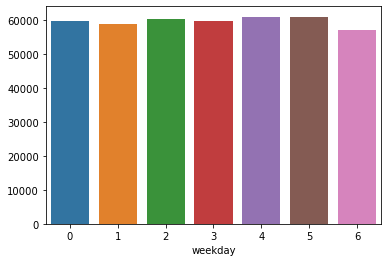

In [37]:
barplots('weekday')

0:월
1:화
2:수
3:목
4:금
5:토
6:일

In [40]:
train_label = train['number_of_rentals']
train.drop(['date_time', 'wind_direction', 'Precipitation_Probability', 'month', 'number_of_rentals'], axis=1, inplace= True)
test.drop(['date_time', 'wind_direction', 'Precipitation_Probability', 'month'],axis=1, inplace= True)

In [46]:
train_label

0       22994
1       28139
2       26817
3       26034
4        2833
        ...  
268     96150
269    107001
270     98568
271     70053
272     38086
Name: number_of_rentals, Length: 273, dtype: int64

In [42]:
#모델
from sklearn.ensemble import RandomForestRegressor

rt =RandomForestRegressor(random_state = 0, n_estimators = 100)
rt.fit(train,train_label)
sample_submission=pd.read_csv('sample_submission.csv')
sample_submission['number_of_rentals']= rt.predict(test)
sample_submission.to_csv('biycle.csv', encoding='UTF-8', index=False)

In [44]:
print(rt.predict)

<bound method ForestRegressor.predict of RandomForestRegressor(random_state=0)>
